# Example notebook

This notebook demonstrates some of the more interesting features of [stacrs](https://pypi.org/project/stacrs/).

## stac-geoparquet

The [stac-geoparquet](https://github.com/stac-utils/stac-geoparquet/blob/main/spec/stac-geoparquet-spec.md) specification describes how to store STAC items in a [geoparquet](https://geoparquet.org/).
Use **stacrs** to read and write **stac-geoparquet**.

In [6]:
import stacrs

items = await stacrs.search(
    "https://stac.eoapi.dev",
    collections="openaerialmap",
    bbox=[-125, 25, -67, 49],  # CONUS
    sortby="-properties.datetime",
    max_items=1000,
)
await stacrs.write(
    "items.parquet", items, format="parquet[snappy]"
)  # compressed stac-geoparquet

### Search

In addition to using `search` on STAC APIs, you can use [DuckDB](https://duckdb.org/) to search **stac-geoparquet**.

Found 20 items


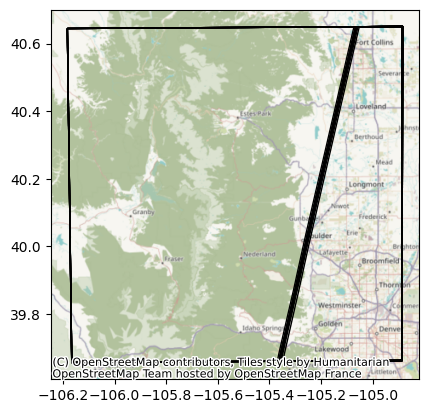

In [7]:
import contextily
import stacrs
from geopandas import GeoDataFrame

url = "https://github.com/gadomski/2024-09-FOSS4G-NA-stac-rs/raw/refs/heads/main/benches/1000-sentinel-2-items-stac-rs.parquet"
items = await stacrs.search(
    url, intersects={"type": "Point", "coordinates": [-105.1019, 40.1672]}
)
print(f"Found {len(items)} items")
data_frame = GeoDataFrame.from_features(items, crs="EPSG:4326")
axis = data_frame.plot(facecolor="none")
contextily.add_basemap(axis, crs=data_frame.crs.to_string())

### To arrow

If you installed **stacrs** with the `arrow` extra (`python -m pip install 'stacrs[arrow]'`) you can search **stac-geoparquet** files into an arrow table, which can be loaded directly into (e.g.) GeoPandas.
This will be significantly more efficient than loading Python dictionaries into a data frame.

In [8]:
from stacrs import DuckdbClient

client = DuckdbClient()
items = client.search_to_arrow(
    "items.parquet", datetime="2020-01-01T00:00:00Z/.."
)  # you can search a parquet file with DuckDB
data_frame = GeoDataFrame.from_arrow(items)
data_frame

,stac_version,stac_extensions,id,file:size,provider,links,assets,collection,datetime,start_datetime,end_datetime,title,platform,bbox,geometry,filename
0,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,66de01d9cd0baa0001b61fd3,5647695,Efthimios F.,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.us-e...,openaerialmap,NaT,2024-09-07 22:00:00-06:00,2024-09-08 13:33:51.317000-06:00,Honesdale Pa,uav,"{'xmin': -75.257933, 'ymin': 41.566194, 'xmax'...","MULTIPOLYGON (((-75.25793 41.56724, -75.25793 ...",items.parquet
1,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,66d4981611a1ae0001f7b089,3337391,South Holston Drone Operations,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.us-e...,openaerialmap,NaT,2024-08-31 22:00:00-06:00,2024-09-01 10:26:39.555000-06:00,K Jones 2,satellite,"{'xmin': -82.213313, 'ymin': 36.619578, 'xmax'...","MULTIPOLYGON (((-82.21331 36.62206, -82.21327 ...",items.parquet
2,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,66d497a011a1ae0001f7b088,9975450,South Holston Drone Operations,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.us-e...,openaerialmap,NaT,2024-08-29 22:00:00-06:00,2024-08-29 23:00:00-06:00,K Jones,uav,"{'xmin': -82.212749, 'ymin': 36.620306, 'xmax'...","MULTIPOLYGON (((-82.21275 36.62301, -82.21271 ...",items.parquet
3,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,66db50c5cd0baa0001b61f88,23125850,WebODM,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.us-e...,openaerialmap,NaT,2024-08-22 13:00:00-06:00,2024-08-22 14:00:00-06:00,County Park,uav,"{'xmin': -88.535721, 'ymin': 44.0783, 'xmax': ...","MULTIPOLYGON (((-88.53572 44.08013, -88.53567 ...",items.parquet
4,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,66cf527611a1ae0001f7afbf,208119745,FOUR POINTS,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.us-e...,openaerialmap,NaT,2024-08-15 05:15:47-06:00,2024-08-15 06:15:47-06:00,Fifth Road East - 8/15/2024,uav,"{'xmin': -79.730944, 'ymin': 43.176711, 'xmax'...","MULTIPOLYGON (((-79.73067 43.19008, -79.73094 ...",items.parquet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,5e227dbe50259f000541fc42,9874294,WebODM,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.amaz...,openaerialmap,NaT,2020-01-17 05:31:34-07:00,2020-01-17 06:31:34-07:00,Task of 2020-01-18T02:04:04.280Z,uav,"{'xmin': -119.001888, 'ymin': 34.211746, 'xmax...","MULTIPOLYGON (((-119.00189 34.21296, -119.0018...",items.parquet
739,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,5e223b4e50259f000541fc3c,21102668,tirogue,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.amaz...,openaerialmap,NaT,2020-01-17 00:00:00-07:00,2020-01-17 15:47:10.155000-07:00,"akiwik,i",satellite,"{'xmin': -110.956421, 'ymin': 29.03546, 'xmax'...","MULTIPOLYGON (((-110.95642 29.04026, -110.9564...",items.parquet
740,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,5e22ba7650259f000541fc45,67917267,WebODM,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.amaz...,openaerialmap,NaT,2020-01-15 06:49:16-07:00,2020-01-15 11:49:16-07:00,Shepard Rollins Trail East 2020-01-15,uav,"{'xmin': -92.312534, 'ymin': 38.938449, 'xmax'...","MULTIPOLYGON (((-92.31249 38.94295, -92.31253 ...",items.parquet
741,1.1.0,[https://stac-extensions.github.io/file/v2.1.0...,5e22bc0f50259f000541fc48,10911074,WebODM,[{'href': 'https://stac.eoapi.dev/collections/...,{'image': {'href': 'https://oin-hotosm.s3.amaz...,openaerialmap,NaT,2020-01-15 01:31:05-07:00,2020-01-15 02:31:05-07:00,Shepard Rollins Trail West 2020-01-15,uav,"{'xmin': -92.315732, 'ymin': 38.939029, 'xmax'...","MULTIPOLYGON (((-92.31571 38.94125, -9

Because of the way **GeoPandas** handles underlying arrays and dictionaries, you can't go directly back to a JSON dictionary via `to_json`.
However, you can go back through **stac-geoparquet** via `to_arrow`.

In [11]:
from pystac import ItemCollection

table = data_frame.to_arrow()
item_collection_dict = stacrs.from_arrow(table)
_ = ItemCollection.from_dict(item_collection_dict)

## Search to

If you want to save the results of a STAC API search directly to a file, use `search_to`.
This will generally be more performant than using `search` then `write`.

In [10]:
await stacrs.search_to(
    "items.parquet",
    "https://stac.eoapi.dev",
    collections="openaerialmap",
    bbox=[-125, 25, -67, 49],  # CONUS
    sortby="-properties.datetime",
    max_items=1000,
    format="parquet[snappy]",
)

1000